##                                          Advanced Lane Finding Project

## Camera Calibration using chessboard images

In [54]:
# import packages
import glob
from codes.preprocessing import *
import os

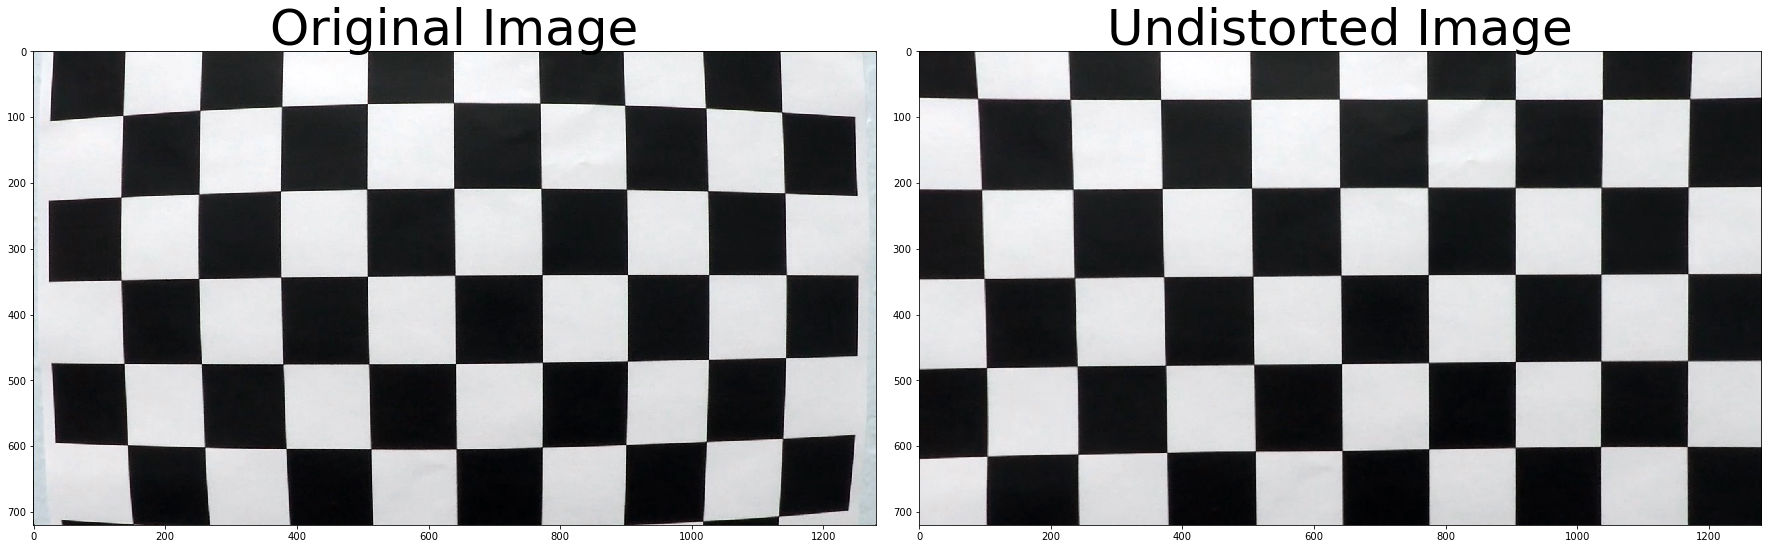

In [73]:
# define params
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# get the chessboard images
images = glob.glob('camera_calibration/calibration*.jpg')

# calculate the object points and image points
objpoints, imgpoints = get_img_obj_points(images, nx, ny)

# save object points and image points for future use
create_pickle_file(objpoints, imgpoints)

# get the object points and image points
dist_pickle = pickle.load( open( "wide_dist.pickle", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

# Undistort an image using object points and image points 
img = images[0]
img = cv2.imread(img)
undistorted_img = np.copy(img)
ret, mtx, dist, rvecs, tvecs = calibrate_camera(undistorted_img, objpoints, imgpoints)
undistort_img = undistort_image(undistorted_img, mtx, dist)

# plot the distorted vs undistorted image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistort_img)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

## Correct distortion on road images

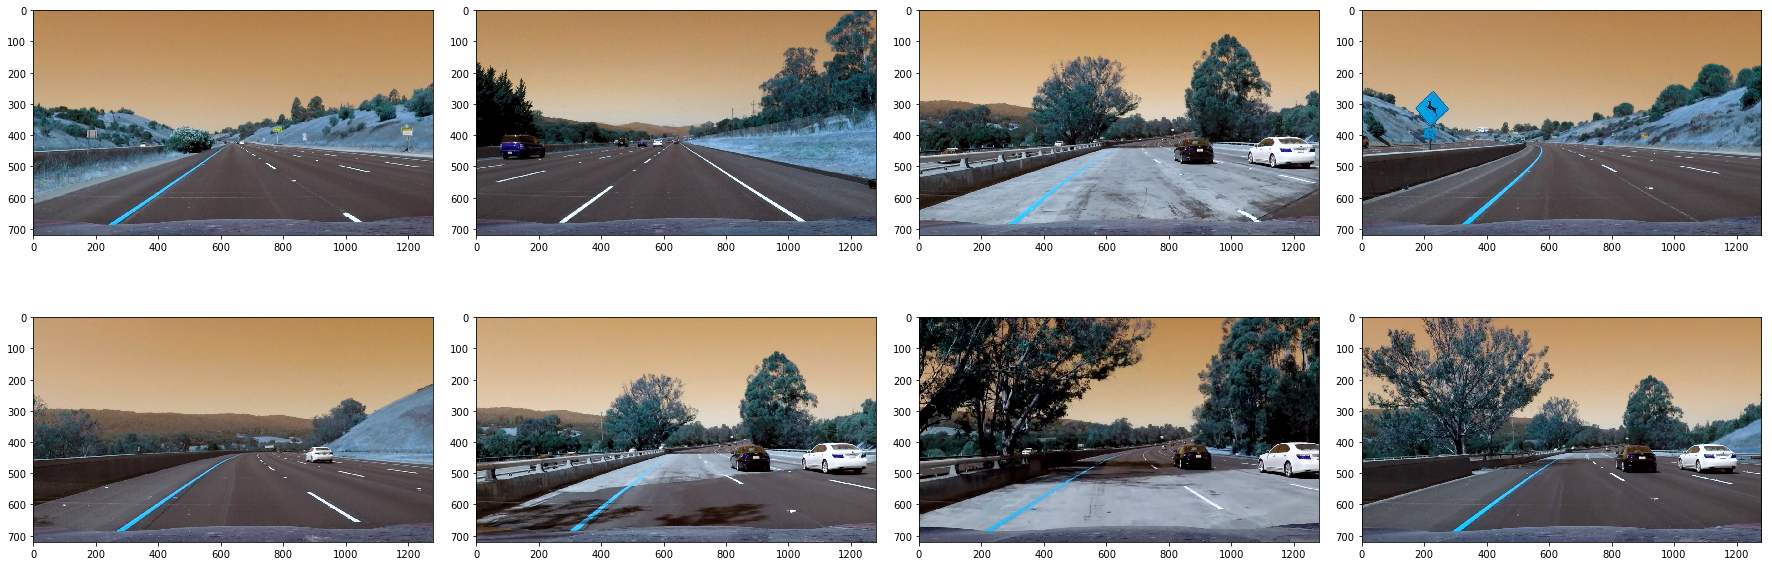

In [70]:
# get the test images
test_images = []
for image in glob.glob('test_images/*.jpg'):
    test_images.append(image)

f, (ax1, ax2) = plt.subplots(2, 4, figsize=(24, 9))
f.tight_layout()
half = len(test_images)//2
for i in range(len(test_images)//2):
    ax1[i].imshow(cv2.imread(test_images[i]))
    ax2[i].imshow(cv2.imread(test_images[half + i]))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

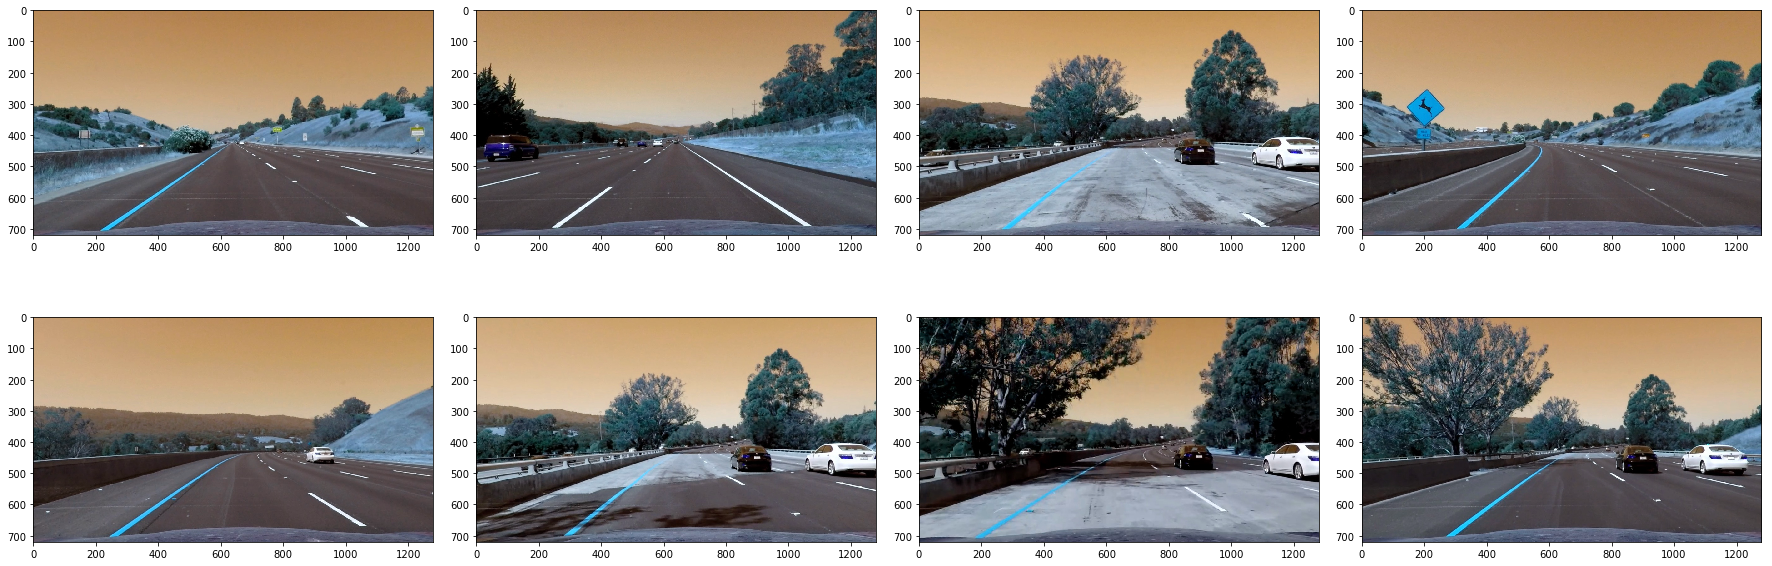

In [72]:
# correct distortion
for image in test_images:
    img = cv2.imread(image)
    img = np.copy(img)
    ret, mtx, dist, rvecs, tvecs = calibrate_camera(img, objpoints, imgpoints)
    img = undistort_image(img, mtx, dist)
    cv2.imshow('img', img)
    file_img = image.split('/')[1]
    file_path = os.path.join('output_images/undistorted_images/',file_img)
    cv2.imwrite(file_path, img)
    
undistorted_images = []
for image in glob.glob('output_images/undistorted_images/*.jpg'):
    undistorted_images.append(image)
    
f, (ax1, ax2) = plt.subplots(2, 4, figsize=(24, 9))
f.tight_layout()
half = len(undistorted_images)//2
for i in range(len(undistorted_images)//2):
    ax1[i].imshow(cv2.imread(undistorted_images[i]))
    ax2[i].imshow(cv2.imread(undistorted_images[half + i]))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [143]:
img = cv2.imread(undistorted_images[0])
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

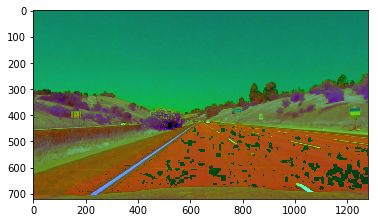

In [147]:
plt.imshow(hls)
plt.show()

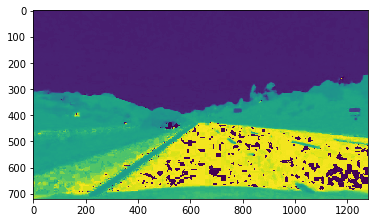

In [148]:
h = hls[:, :, 0]
plt.imshow(h)
plt.show()

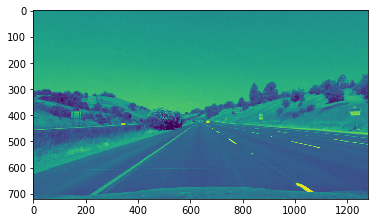

In [153]:
h = hls[:, :, 1]
plt.imshow(h)
plt.show()

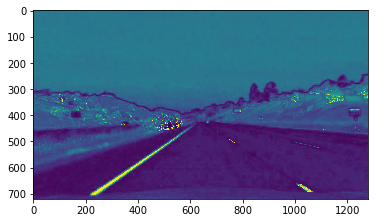

In [154]:
s = hls[:, :, 2]
plt.imshow(s)
plt.show()

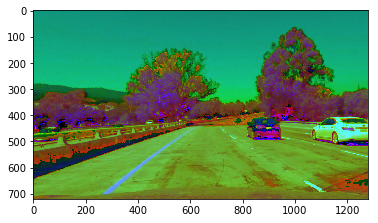

In [155]:
img = cv2.imread(undistorted_images[2])
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
plt.imshow(hls)
plt.show()

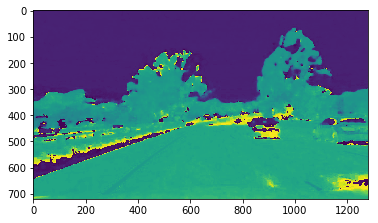

In [156]:
h = hls[:, :, 0]
plt.imshow(h)
plt.show()

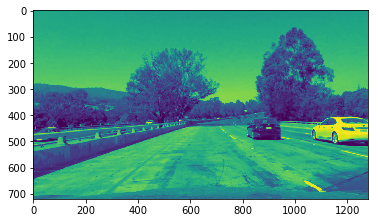

In [158]:
l = hls[:, :, 1]
plt.imshow(l)
plt.show()

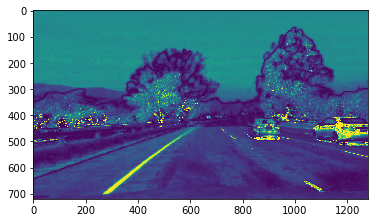

In [159]:
s = hls[:, :, 2]
plt.imshow(s)
plt.show()

### Color Transform and gradient transform

In [140]:
for image in undistorted_images:
    img = cv2.imread(image)
    img = np.copy(img)
    img = pipeline(img, s_thresh=(170, 255), sx_thresh=(10, 100))
    file_img = image.split('/')[2]
    
    file_path = os.path.join('output_images/transform/',file_img)
    cv2.imwrite(file_path, img)
    

In [141]:
transformed_images = []
for image in glob.glob('output_images/transform/*.jpg'):
    transformed_images.append(image)

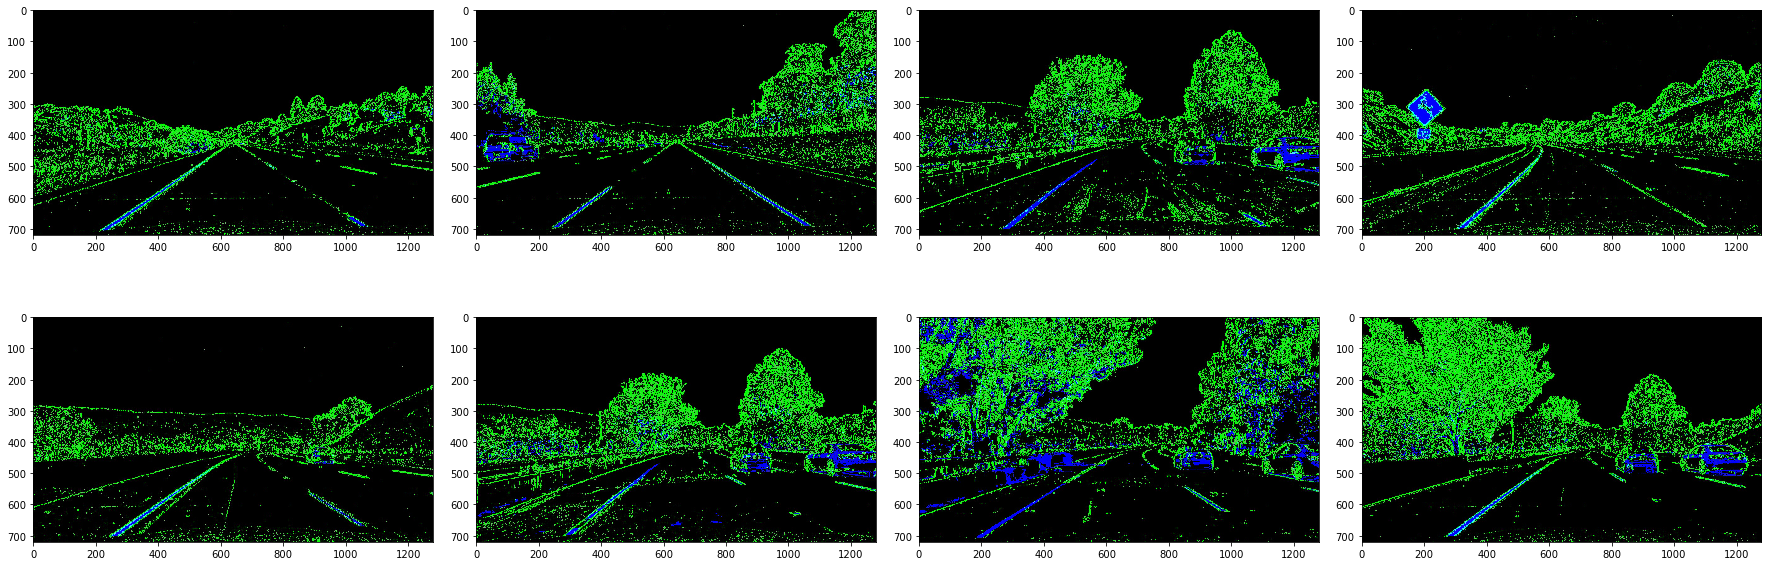

In [142]:
f, (ax1, ax2) = plt.subplots(2, 4, figsize=(24, 9))
f.tight_layout()
half = len(transformed_images)//2
for i in range(len(transformed_images)//2):
    ax1[i].imshow(cv2.imread(transformed_images[i]))
    ax2[i].imshow(cv2.imread(transformed_images[half + i]))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### Perspective Transform

In [135]:
offset = 100
for image in transformed_images:
    img = cv2.imread(image)
    img = np.copy(img)
    img_size = (img.shape[1], img.shape[0])
    src = np.float32([imgpoints[0][0], imgpoints[0][nx-1], imgpoints[0][-1], imgpoints[0][-nx]])
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset], \
                    [img_size[0]-offset, img_size[1]-offset], \
                    [offset, img_size[1]-offset]])
    transform = perspective_transform(src, dst)
    warped = warp_image(img, transform, img_size, flags=cv2.INTER_LINEAR)
    
    file_img = image.split('/')[2]
    
    file_path = os.path.join('output_images/warped_images/',file_img)
    cv2.imwrite(file_path, img)
    




In [136]:
warped_images = []
for image in glob.glob('testing/*.jpg'):
    warped_images.append(image)

In [137]:
warped_images

['testing/straight_lines1.jpg',
 'testing/straight_lines2.jpg',
 'testing/test1.jpg',
 'testing/test2.jpg',
 'testing/test3.jpg',
 'testing/test4.jpg',
 'testing/test5.jpg',
 'testing/test6.jpg']

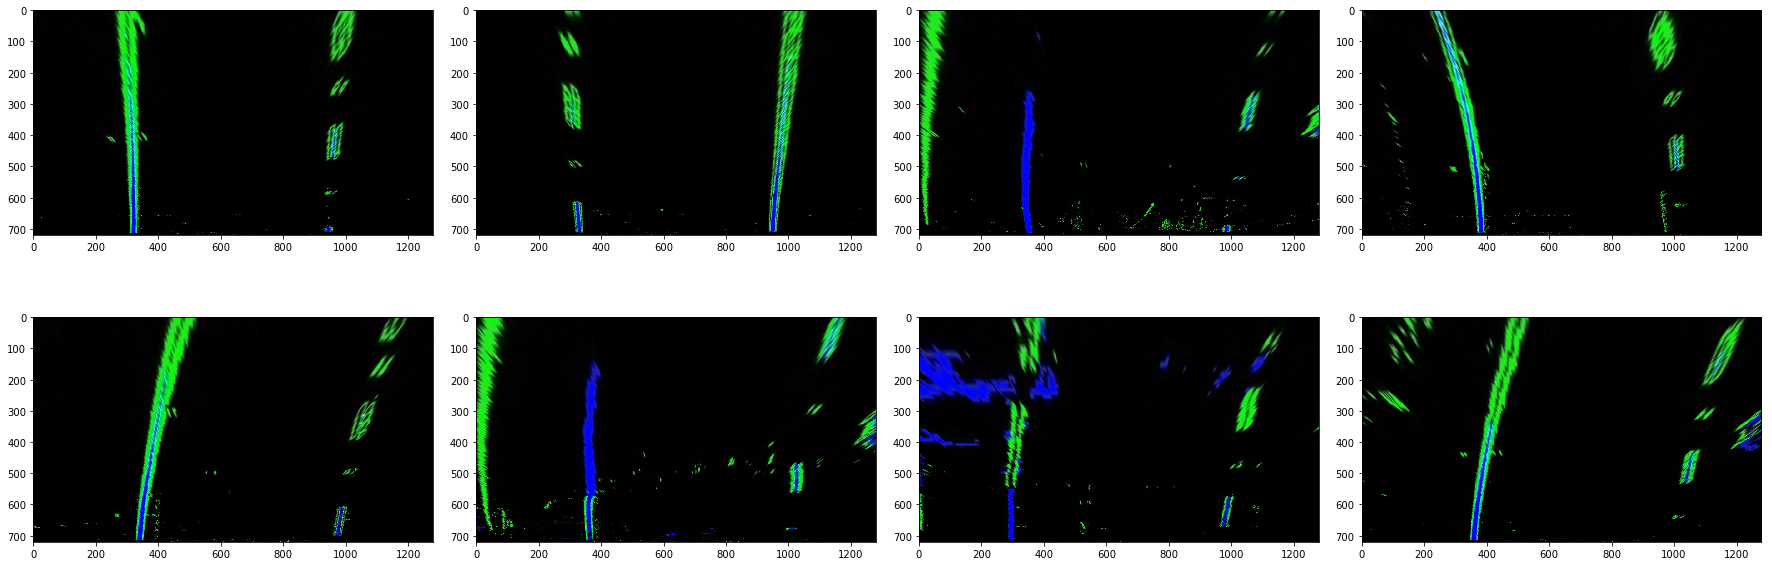

In [138]:
f, (ax1, ax2) = plt.subplots(2, 4, figsize=(24, 9))
f.tight_layout()
half = len(warped_images)//2
for i in range(len(warped_images)//2):
    ax1[i].imshow(cv2.imread(warped_images[i]))
    ax2[i].imshow(cv2.imread(warped_images[half + i]))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [50]:
print(warped_images[1])

testing/straight_lines1.jpg


1
(720, 1280, 3)
hello
[ 8  0  0  1 10 11  0  1 10 11  0  1  2 10 11 12  0  1  2 11 12 13 14  0  1
  2 11 12 13 14  0  1  2  3  4 13 14 15 16  0  1  2  3  4  5 13 14 15 16 17
  0  1  2  3  4  5  6 13 14 15 16 17 18  0  1  2  3  4  5  6  7 14 15 16 17
 18 19  0  1  2  3  4  5  6  7 14 15 16 17 18 19  0  1  2  3  4  5  6  7 16
 17 18 19 20  0  1  2  3  4  5  6  7  8 16 17 18 19 20 21  0  1  2  3  4  5
  6  7  8  9 16 17 18 19 20 21 22  1  2  3  4  5  6  7  8  9 10 11 18 19 20
 21 22 23  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23  3  4  5  6  7  8
  9 10 11 12 19 20 21 22 23 24  3  4  5  6  7  8  9 10 11 12 20 21 22 23 24
 25  3  4  5  6  7  8  9 10 11 12 13 20 21 22 23 24 25  3  4  5  6  7  8  9
 10 11 12 13 21 22 23 24 25 26  4  5  6  7  8  9 10 11 12 13 22 23 24 25 26
 27  4  5  6  7  8  9 10 11 12 13 14 15 16 17 22 23 24 25 26 27 28  4  5  6
  7  8  9 10 11 12 13 14 15 16 17 18 19 20 25 26 27 28 29  5  6  7  8  9 10
 11 12 13 14 15 16 17 18 19 20 21 25 26 27 28 29  6  7  8  9 10 1

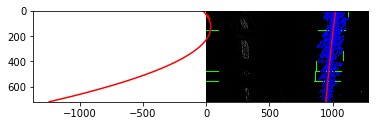

Left curvatures,  66.3416438155
right curvatures,  4759.50907214
Vehicle position 2412.92535798
2
(720, 1280, 3)
hello
[  0   1   2 ..., 174 175 176]
[640 640 640 ...,  79  79  79]


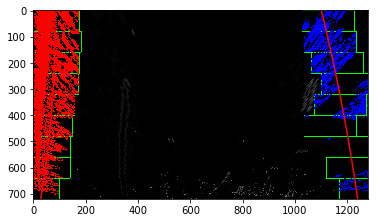

Left curvatures,  1237.12141583
right curvatures,  2393.33849606
Vehicle position 1815.22995594
3
(720, 1280, 3)
hello
[  0   4   5 ..., 142 144 145]
[640 640 640 ...,  79  79  79]


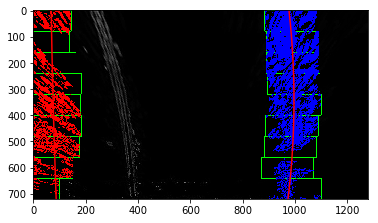

Left curvatures,  11282.2285086
right curvatures,  1018.56534318
Vehicle position 6150.39692587
4
(720, 1280, 3)
hello
[  5   6   7 ..., 125 126 127]
[656 656 656 ...,  79  79  79]


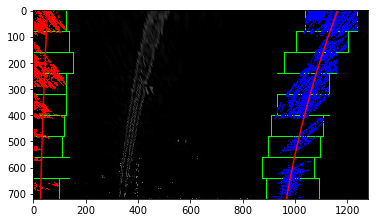

Left curvatures,  8424.76507045
right curvatures,  1178.26701558
Vehicle position 4801.51604302
5
(720, 1280, 3)
hello
[  0   1   2 ..., 172 173 174]
[640 640 640 ...,  79  79  79]


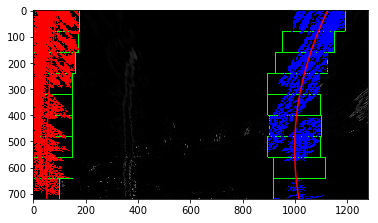

Left curvatures,  1653.85415217
right curvatures,  365.256342761
Vehicle position 1009.55524747
6
(720, 1280, 3)
hello
[  1   2   3 ..., 176 177 184]
[640 640 640 ...,  79  79  79]


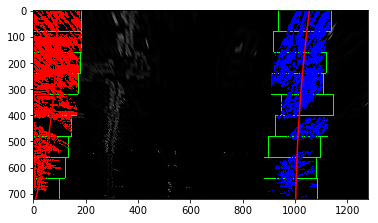

Left curvatures,  832.134345365
right curvatures,  2132.79772621
Vehicle position 1482.46603579
7
(720, 1280, 3)
hello
[  0   1   2 ..., 202 203 204]
[647 647 647 ...,  79  79  79]


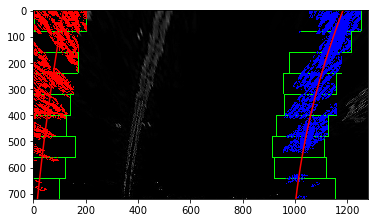

Left curvatures,  3346.81721116
right curvatures,  892.318666338
Vehicle position 2119.56793875


In [139]:
for i in range(1, len(warped_images)):
    print(i)
    img = cv2.imread(warped_images[i])
    img  = np.copy(img)
    print(img.shape)
    s_channel = img[:, :, 0]
    img, left_fit_cr, right_fit_cr, ploty  = fit_polynomial(s_channel)
    left_curverad, right_curverad = calculate_radius_curvature(ploty, left_fit_cr, right_fit_cr)
    print('Left curvatures, ', left_curverad)
    print('right curvatures, ', right_curverad)
    print('Vehicle position',(left_curverad + right_curverad)/2 )

### Determine the curvature of the lane and vehicle position with respect to center

### Warp the detected lane boundaries back onto the original image

### Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.